In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, './renderer')
sys.path.insert(0, '../')

from collections import namedtuple
import render_car_instances as rci
import utils.utils as uts
import glob
import os

import numpy as np
np.set_printoptions(threshold=np.nan)
import matplotlib.pyplot as plt
%matplotlib inline

import ntpath
pattern = '*%s.%s' % ('_Camera_5', 'jpg')
apollo_images_root = '/home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/images'
search_files = os.path.join(apollo_images_root, pattern)
filenames = sorted(glob.glob(search_files))

for filename in filenames:
    print ntpath.basename(filename)

ImportError: numpy.core.multiarray failed to import

ImportError: numpy.core.multiarray failed to import

# Write pose maps to .npy files

INFO:root:loading 79 car models


--- 0/838...
Original and rescaled image size:  (2710, 3384, 3) [544 680]
Test images saved at /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053947113_Camera_5_plot.jpg --utils


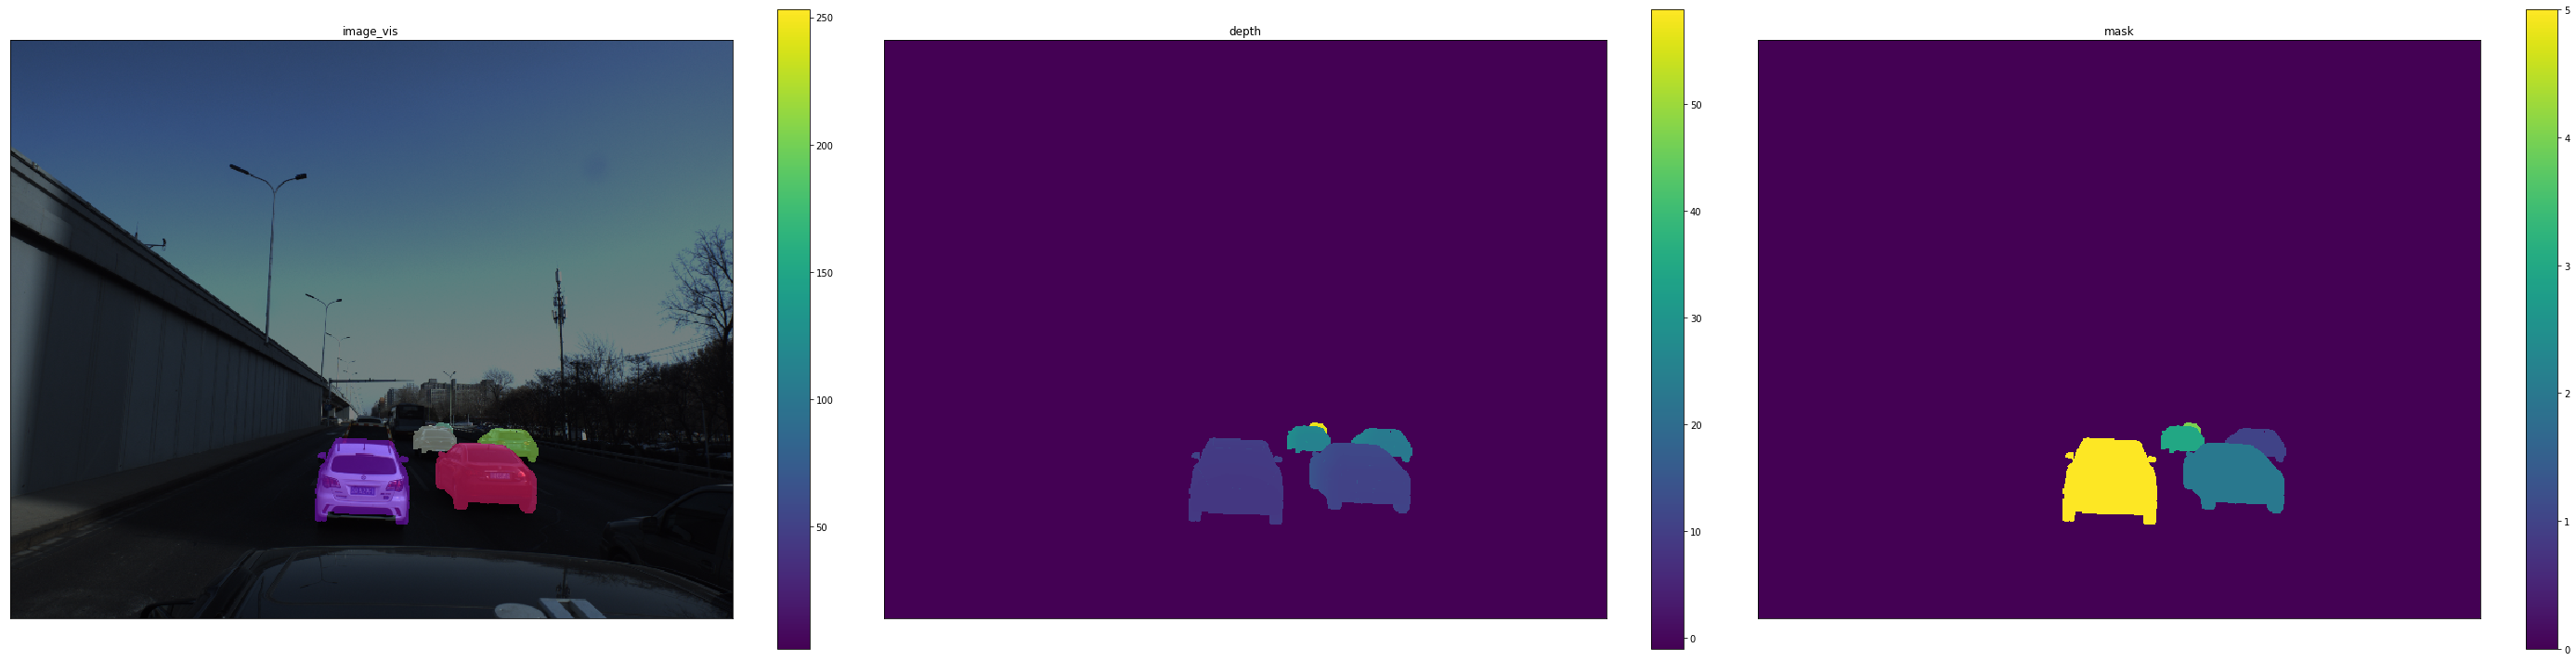

(544, 680) float64
float32 0.000450293


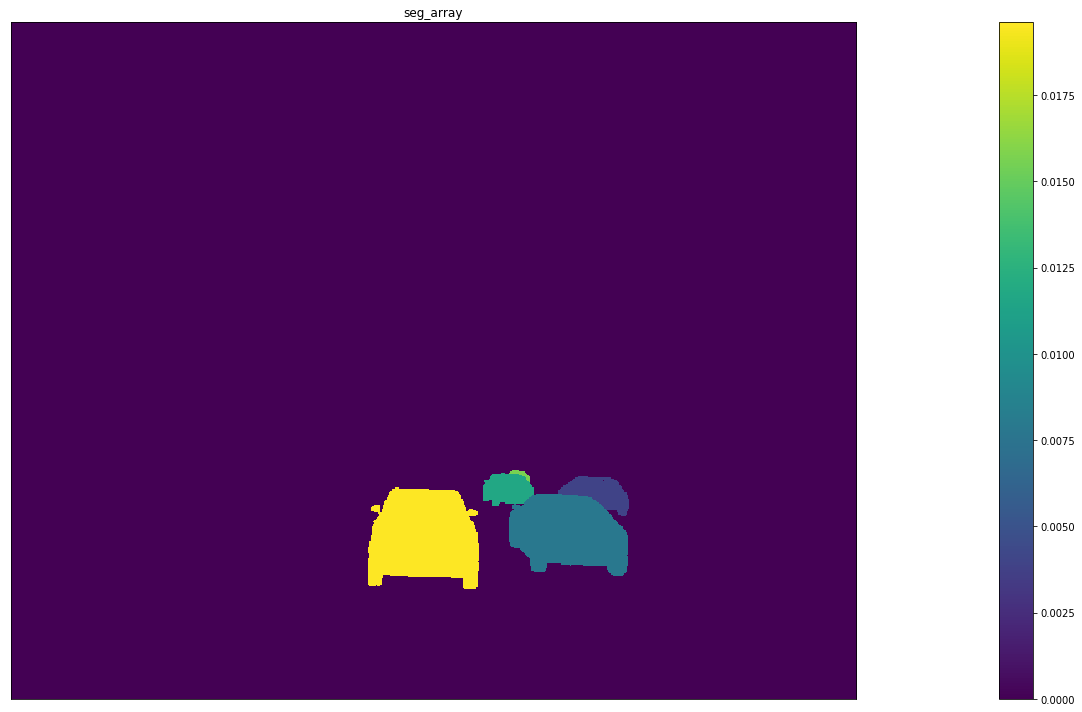

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053947113_Camera_5_posedict.npy


In [59]:
from PIL import Image
import h5py
import scipy.io as sio

Setting = namedtuple('Setting', ['data_dir'])
setting = Setting('../apolloscape/3d_car_instance_sample/')

visualizer = rci.CarPoseVisualizer(setting, scale=0.2)
visualizer.load_car_models()

for file_idx, filename in enumerate(filenames):
    print '--- %d/%d...'%(file_idx, len(filenames))
    image_name = ntpath.basename(filename).replace('.jpg', '')
    folder_name = 'pose_maps_02'
    plot_path = filename.replace('images', folder_name).replace('.jpg', '_plot.jpg')
    image_vis, seg_array, depth, pose_map, image_rescaled, pose_list = visualizer.showAnn(image_name, if_visualize=file_idx<20, if_save=True, plot_path=plot_path)
    
    print seg_array.shape, seg_array.dtype
#     pose_map_path = filename.replace('images', 'pose_maps').replace('.jpg', '_posemap.npy')
#     np.save(pose_map_path, np.float32(pose_map)) 
    
#     pose_map_path = filename.replace('images', folder_name).replace('.jpg', '_posemap.h5')
#     with h5py.File(pose_map_path, 'w') as hf:
#         hf.create_dataset("posemap",  data=np.float32(pose_map), compression="gzip")

    image_rescaled = Image.fromarray(np.uint8(image_rescaled))
    image_rescaled_name = filename.replace('images', folder_name).replace('.jpg', '_rescaled.png')
    image_rescaled.save(image_rescaled_name)
    
    image_vis = Image.fromarray(np.uint8(image_vis))
    image_vis_name = filename.replace('images', folder_name).replace('.jpg', '_vis.png')
    image_vis.save(image_vis_name)
    
    seg = Image.fromarray(np.uint8(seg_array))
    seg_name = filename.replace('images', folder_name).replace('.jpg', '_seg.png')
    seg.save(seg_name)
    
    pose_dict_path = filename.replace('images', folder_name).replace('.jpg', '_posedict.npy')
    pose_list_array = np.asarray(pose_list)
#     pose_list_array = np.hstack((np.arange(0, len(pose_list)).reshape((-1, 1)), np.asarray(pose_list)))
    np.save(pose_dict_path, np.float32(pose_list_array)) 
    
    if file_idx<20:
        seg_saved = plt.imread(seg_name)
        print seg_saved.dtype, np.mean(seg_saved)
        uts.plot_images({'seg_array': seg_saved}, 
                        layout=[1, 1], fig_size=3, save_fig=False, fig_name='seg_array')

    print 'Saved to '+pose_dict_path  
    
    break

# Crop half

In [64]:
def crop_half(image):
    print image.shape
    if len(image.shape)==3:
        return image[image.shape[0]//2:, :, :]
    elif len(image.shape)==2:
        return image[image.shape[0]//2:, :]

for file_idx, filename in enumerate(filenames):
    print '--- %d/%d...'%(file_idx, len(filenames))
    image_name = ntpath.basename(filename).replace('.jpg', '')
    folder_name = 'pose_maps_02'
    plot_path = filename.replace('images', folder_name).replace('.jpg', '_plot.jpg')
    
    for file_name in ['_rescaled.png', '_vis.png', '_seg.png']: 
#     for file_name in ['_seg.png']: 
        image_name = filename.replace('images', folder_name).replace('.jpg', file_name)
        im = plt.imread(image_name)
#         uts.plot_images({'pose_map': im}, 
#                 layout=[1, 3], fig_size=40, save_fig=False, fig_name='pose_map')
        half_im = np.uint8(crop_half(im)*255.)
        Image.fromarray(half_im).save(image_name.replace('.png', '_half.png'))
        
#         seg_saved = plt.imread(image_name.replace('.png', '_half.png'))
#         print seg_saved.dtype, np.mean(seg_saved)
#         uts.plot_images({'pose_map': seg_saved}, 
#                 layout=[1, 3], fig_size=40, save_fig=False, fig_name='pose_map')
        
        print 'Saved to '+image_name.replace('.png', '_half.png')
    
#     break

--- 0/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053947113_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053947113_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053947113_Camera_5_seg_half.png
--- 1/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053947909_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053947909_Camera_5_vis_half.p

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053952679_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053952679_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053952679_Camera_5_seg_half.png
--- 15/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053952888_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053952888_Camera_5_vis_half.png
(544, 680)
Saved to /ho

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053955385_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053955385_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053955385_Camera_5_seg_half.png
--- 29/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053955572_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053955572_Camera_5_vis_half.png
(544, 680)
Saved to /ho

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053957763_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053957763_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053957763_Camera_5_seg_half.png
--- 43/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053957930_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053957930_Camera_5_vis_half.png
(544, 680)
Saved to /ho

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053959953_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_053959953_Camera_5_seg_half.png
--- 57/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054000100_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054000100_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054000100_Camera_5_seg_half.png
--- 58/838...
(54

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054002011_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054002011_Camera_5_seg_half.png
--- 71/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054002158_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054002158_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054002158_Camera_5_seg_half.png
--- 72/838...
(544, 680, 3)
Sav

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054004069_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054004069_Camera_5_seg_half.png
--- 85/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054004216_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054004216_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054004216_Camera_5_seg_half.png
--- 86/838...
(544, 680, 3)
Sav

(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054006127_Camera_5_seg_half.png
--- 99/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054006274_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054006274_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054006274_Camera_5_seg_half.png
--- 100/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054006421_Camera_5_rescaled_half.p

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054013478_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054013478_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054013478_Camera_5_seg_half.png
--- 114/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054013605_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054013605_Camera_5_vis_half.png
(544, 68

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054015256_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054015256_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054015256_Camera_5_seg_half.png
--- 128/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054015383_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054015383_Camera_5_vis_half.png
(544, 68

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054018658_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054018658_Camera_5_seg_half.png
--- 142/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054018765_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054018765_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054018765_Camera_5_seg_half.png
--- 143/838...
(

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054020156_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054020156_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054020156_Camera_5_seg_half.png
--- 156/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054020263_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054020263_Camera_5_vis_half.png
(544, 680)
Saved to /h

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054023900_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054023900_Camera_5_seg_half.png
--- 170/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054024007_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054024007_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054024007_Camera_5_seg_half.png
--- 171/838...
(544, 680, 3)
S

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054025505_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054025505_Camera_5_seg_half.png
--- 184/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054025612_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054025612_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054025612_Camera_5_seg_half.png
--- 185/838...
(

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054027003_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054027003_Camera_5_seg_half.png
--- 198/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054027110_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054027110_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054027110_Camera_5_seg_half.png
--- 199/838...
(

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054028501_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054028501_Camera_5_seg_half.png
--- 212/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054028608_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054028608_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054028608_Camera_5_seg_half.png
--- 213/838...
(544, 680, 3)
S

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054030106_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054030106_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054030106_Camera_5_seg_half.png
--- 227/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054030213_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054030213_Camera_5_vis_half.png
(544, 68

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054031604_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054031604_Camera_5_seg_half.png
--- 241/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054031711_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054031711_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054031711_Camera_5_seg_half.png
--- 242/838...
(544, 680, 3)
S

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054033209_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054033209_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054033209_Camera_5_seg_half.png
--- 256/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054033316_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054033316_Camera_5_vis_half.png
(544, 68

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054034707_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054034707_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054034707_Camera_5_seg_half.png
--- 270/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054034814_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054034814_Camera_5_vis_half.png
(544, 680)
Saved to /h

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054036205_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054036205_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054036205_Camera_5_seg_half.png
--- 284/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054036312_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054036312_Camera_5_vis_half.png
(544, 680)
Saved to /h

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054037703_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054037703_Camera_5_seg_half.png
--- 298/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054037810_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054037810_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054037810_Camera_5_seg_half.png
--- 299/838...
(

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054039261_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054039261_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054039261_Camera_5_seg_half.png
--- 312/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054039388_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054039388_Camera_5_vis_half.png
(544, 680)
Saved to /h

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054041039_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054041039_Camera_5_seg_half.png
--- 326/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054041166_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054041166_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054041166_Camera_5_seg_half.png
--- 327/838...
(

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054042816_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054042816_Camera_5_seg_half.png
--- 340/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054042943_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054042943_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054042943_Camera_5_seg_half.png
--- 341/838...
(544, 680, 3)
S

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054044594_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054044594_Camera_5_seg_half.png
--- 354/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054044721_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054044721_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054044721_Camera_5_seg_half.png
--- 355/838...
(544, 680, 3)
S

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054046372_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054046372_Camera_5_seg_half.png
--- 368/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054046499_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054046499_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054046499_Camera_5_seg_half.png
--- 369/838...
(544, 680, 3)
S

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054048277_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054048277_Camera_5_seg_half.png
--- 382/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054048404_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054048404_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054048404_Camera_5_seg_half.png
--- 383/838...
(544, 680, 3)
S

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054050182_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054050182_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054050182_Camera_5_seg_half.png
--- 397/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054050309_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054050309_Camera_5_vis_half.png
(544, 68

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054051960_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054051960_Camera_5_seg_half.png
--- 411/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054052087_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054052087_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054052087_Camera_5_seg_half.png
--- 412/838...
(544, 680, 3)
S

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054053738_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054053738_Camera_5_seg_half.png
--- 425/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054053865_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054053865_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054053865_Camera_5_seg_half.png
--- 426/838...
(544, 680, 3)
S

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054055516_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054055516_Camera_5_seg_half.png
--- 439/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054055643_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054055643_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054055643_Camera_5_seg_half.png
--- 440/838...
(544, 680, 3)
S

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054057548_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054057548_Camera_5_seg_half.png
--- 453/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054057675_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054057675_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054057675_Camera_5_seg_half.png
--- 454/838...
(

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054059326_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054059326_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054059326_Camera_5_seg_half.png
--- 467/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054059453_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054059453_Camera_5_vis_half.png
(544, 680)
Saved to /h

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054101231_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054101231_Camera_5_seg_half.png
--- 481/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054101358_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054101358_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054101358_Camera_5_seg_half.png
--- 482/838...
(

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054103009_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054103009_Camera_5_seg_half.png
--- 495/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054103135_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054103135_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054103135_Camera_5_seg_half.png
--- 496/838...
(

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054104786_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054104786_Camera_5_seg_half.png
--- 509/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054104913_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054104913_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054104913_Camera_5_seg_half.png
--- 510/838...
(544, 680, 3)
S

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054106564_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054106564_Camera_5_seg_half.png
--- 523/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054106691_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054106691_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054106691_Camera_5_seg_half.png
--- 524/838...
(544, 680, 3)
S

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054108469_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054108469_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054108469_Camera_5_seg_half.png
--- 538/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054108596_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054108596_Camera_5_vis_half.png
(544, 68

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054110247_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054110247_Camera_5_seg_half.png
--- 552/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054110374_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054110374_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054110374_Camera_5_seg_half.png
--- 553/838...
(544, 680, 3)
S

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054112025_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054112025_Camera_5_seg_half.png
--- 566/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054112152_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054112152_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054112152_Camera_5_seg_half.png
--- 567/838...
(

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054113803_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054113803_Camera_5_seg_half.png
--- 580/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054113930_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054113930_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054113930_Camera_5_seg_half.png
--- 581/838...
(544, 680, 3)
S

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054115581_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054115581_Camera_5_seg_half.png
--- 594/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054115708_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054115708_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054115708_Camera_5_seg_half.png
--- 595/838...
(544, 680, 3)
S

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054117359_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054117359_Camera_5_seg_half.png
--- 608/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054119772_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054119772_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054119772_Camera_5_seg_half.png
--- 609/838...
(544, 680, 3)
S

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054121423_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054121423_Camera_5_seg_half.png
--- 622/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054121550_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054121550_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054121550_Camera_5_seg_half.png
--- 623/838...
(544, 680, 3)
S

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054123328_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054123328_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054123328_Camera_5_seg_half.png
--- 637/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054123455_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054123455_Camera_5_vis_half.png
(544, 68

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054125105_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054125105_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054125105_Camera_5_seg_half.png
--- 651/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054125232_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054125232_Camera_5_vis_half.png
(544, 680)
Saved to /h

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054126883_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054126883_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054126883_Camera_5_seg_half.png
--- 665/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054127010_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054127010_Camera_5_vis_half.png
(544, 680)
Saved to /h

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054128661_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054128661_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054128661_Camera_5_seg_half.png
--- 679/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054128788_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054128788_Camera_5_vis_half.png
(544, 680)
Saved to /h

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054130439_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054130439_Camera_5_seg_half.png
--- 693/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054130566_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054130566_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054130566_Camera_5_seg_half.png
--- 694/838...
(

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054132238_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054132238_Camera_5_seg_half.png
--- 707/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054132386_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054132386_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054132386_Camera_5_seg_half.png
--- 708/838...
(

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054134622_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054134622_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054134622_Camera_5_seg_half.png
--- 721/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054134834_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_054134834_Camera_5_vis_half.png
(544, 680)
Saved to /h

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_064945843_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_064945843_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_064945843_Camera_5_seg_half.png
--- 735/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_064947223_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_064947223_Camera_5_vis_half.png
(544, 68

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065437605_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065437605_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065437605_Camera_5_seg_half.png
--- 749/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065541664_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065541664_Camera_5_vis_half.png
(544, 68

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065610307_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065610307_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065610307_Camera_5_seg_half.png
--- 763/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065613475_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065613475_Camera_5_vis_half.png
(544, 68

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065615191_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065615191_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065615191_Camera_5_seg_half.png
--- 777/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065615323_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065615323_Camera_5_vis_half.png
(544, 68

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065617303_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065617303_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065617303_Camera_5_seg_half.png
--- 791/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065617435_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065617435_Camera_5_vis_half.png
(544, 68

(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065709260_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065709260_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065709260_Camera_5_seg_half.png
--- 805/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065709372_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065709372_Camera_5_vis_half.png
(544, 68

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065717772_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065717772_Camera_5_seg_half.png
--- 819/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065718108_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065718108_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065718108_Camera_5_seg_half.png
--- 820/838...
(544, 680, 3)
S

Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065728076_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065728076_Camera_5_seg_half.png
--- 833/838...
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065728188_Camera_5_rescaled_half.png
(544, 680, 3)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065728188_Camera_5_vis_half.png
(544, 680)
Saved to /home/zhurui/Documents/baidu/personal-code/car-fitting/rui_modelfitting/dataset-api/apolloscape/3d_car_instance_sample/pose_maps_02/180116_065728188_Camera_5_seg_half.png
--- 834/838...
(544, 680, 3)
S

In [52]:
im.dtype

dtype('float32')

# Read train/val splits

In [8]:
splits = ['train', 'val']
split_files_folder = '../apolloscape/3d_car_instance_sample/split'

text_file = open('%s/%s.txt'%(split_files_folder, splits[0]), "r")
lines = [line for line in text_file.read().split('\n') if '.jpg' in line]

print len(lines), lines

731 ['180116_053947113_Camera_5.jpg', '180116_053947909_Camera_5.jpg', '180116_053948523_Camera_5.jpg', '180116_053949115_Camera_5.jpg', '180116_053949654_Camera_5.jpg', '180116_053950107_Camera_5.jpg', '180116_053950495_Camera_5.jpg', '180116_053950833_Camera_5.jpg', '180116_053951149_Camera_5.jpg', '180116_053951445_Camera_5.jpg', '180116_053951717_Camera_5.jpg', '180116_053951969_Camera_5.jpg', '180116_053952221_Camera_5.jpg', '180116_053952450_Camera_5.jpg', '180116_053952679_Camera_5.jpg', '180116_053952888_Camera_5.jpg', '180116_053953097_Camera_5.jpg', '180116_053953306_Camera_5.jpg', '180116_053953515_Camera_5.jpg', '180116_053953702_Camera_5.jpg', '180116_053953889_Camera_5.jpg', '180116_053954076_Camera_5.jpg', '180116_053954263_Camera_5.jpg', '180116_053954450_Camera_5.jpg', '180116_053954637_Camera_5.jpg', '180116_053954824_Camera_5.jpg', '180116_053955011_Camera_5.jpg', '180116_053955198_Camera_5.jpg', '180116_053955385_Camera_5.jpg', '180116_053955572_Camera_5.jpg', '1801

# Obsolete

(1356, 1692, 6)


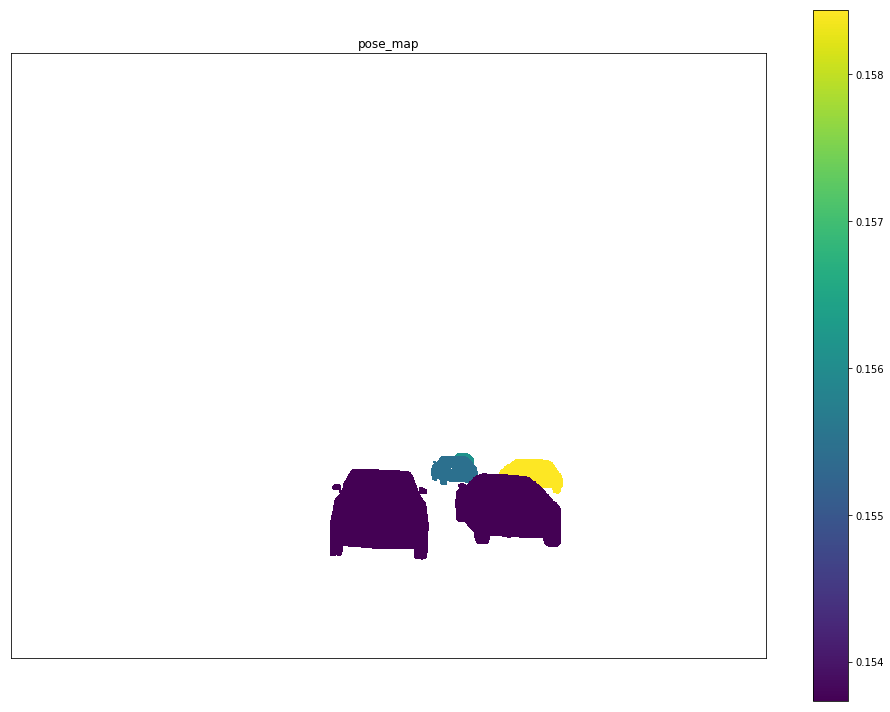

In [19]:
print pose_map.shape
import numpy as np
np.set_printoptions(threshold=np.nan)

import matplotlib.pyplot as plt
import utils.utils as uts
uts.plot_images({'pose_map': np.squeeze(pose_map[:, :, 0])}, 
                layout=[1, 3], fig_size=40, save_fig=False, fig_name='pose_map')

In [18]:
aa = pose_map.flatten().tolist()
bb = [np.float16(it) for it in pose_map.flatten()]
print len(aa), len(bb), pose_map.shape

13766112 13766112 (1356, 1692, 6)
